In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import scipy.stats as si
import pandas as pd

In [11]:
# helper functions

# calculate implied volatility
S = 60
X = 65
r = 0.08
T = 0.25
pm = 8

def NORMSDIST(x): # cumulative normal distribution
     NORMSDIST = si.norm.cdf(x,0.0,1.0)
     return(NORMSDIST)

def ImpliedVolatilityPut(s): # using Newton-Raphson Method
     d1 = ( (np.log(S/X)+(r+0.5*s[0]**2)*T) / (s[0]*np.sqrt(T)) )
     d2 = ( (np.log(S/X)+(r-0.5*s[0]**2)*T) / (s[0]*np.sqrt(T)) )
     of = (  X*np.exp(-r*T)*NORMSDIST(-d2) - S*NORMSDIST(-d1) ) - pm
     val = of**2
     print("[σ]=",s,", Object Function Value:", val)
     return(val)

def price_paths(S, T, r, q, sigma, steps, N):
     dt = T/steps
     #S_{T} = ln(S_{0})+\int_{0}^T(\mu-\frac{\sigma^2}{2})dt+\int_{0}^T \sigma dW(t)
     ST = np.log(S) +  np.cumsum(((r - q - sigma**2/2)*dt +\
                              sigma*np.sqrt(dt) * \
                              np.random.normal(size=(steps,N))),axis=0)
     return np.exp(ST)

# # calculate possible spread of put option price at expiry
# option_df = yf.download('^SPX', '2019-05-01', '2024-04-10')
# option_df = option_df[['Close']]

# # only keep closing price
# option_df = option_df.dropna()
# option_df

In [39]:
def put_payoff(sT, strike_price, premium):
    return np.maximum(strike_price - sT, 0) - premium

spot_price = 5,064.20 # as of 3/05/24

# Long put
strike_price_long_put = 5000
premium_long_put = 93 # as of 31/7/24

# Short Put
strike_price_short_put = 4900
premium_short_put = 59.30 # as of 31/7/24

# Range of put option at expiry
sT = np.arange(4700,5100,1)

# calculate payoffs
long_put_payoff = put_payoff(sT, strike_price_long_put, premium_long_put)
short_put_payoff = put_payoff(sT, strike_price_short_put, premium_short_put) * -1
strategy_putoff = long_put_payoff + short_put_payoff

data = {
    'sT': sT,
    'long_put_payoff': long_put_payoff,
    'short_put_payoff': short_put_payoff,
    'strategy_putoff': strategy_putoff
}

df = pd.DataFrame(data)

print(df)
df.to_excel('put_option_payoffs.xlsx', index=False)

       sT  long_put_payoff  short_put_payoff  strategy_putoff
0    4700              207            -140.7             66.3
1    4701              206            -139.7             66.3
2    4702              205            -138.7             66.3
3    4703              204            -137.7             66.3
4    4704              203            -136.7             66.3
..    ...              ...               ...              ...
395  5095              -93              59.3            -33.7
396  5096              -93              59.3            -33.7
397  5097              -93              59.3            -33.7
398  5098              -93              59.3            -33.7
399  5099              -93              59.3            -33.7

[400 rows x 4 columns]


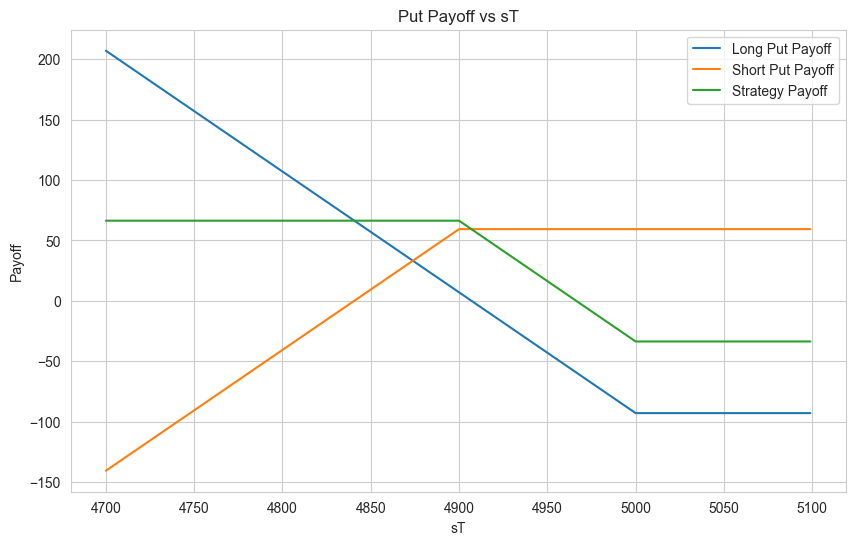

In [38]:
# graph plot
sns.set_style("whitegrid")
# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='sT', y='long_put_payoff', label='Long Put Payoff')
sns.lineplot(data=df, x='sT', y='short_put_payoff', label='Short Put Payoff')
sns.lineplot(data=df, x='sT', y='strategy_putoff', label='Strategy Payoff')

# Set labels and title
plt.xlabel('sT')
plt.ylabel('Payoff')
plt.title('Put Payoff vs sT')

# Show legend
plt.legend()

# Show plot
plt.show()